# Time Series

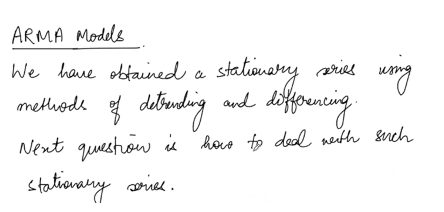

*We model the stationary series with models - AR or MA models or a combination of the two which is ARMA model.*

* How to decide whether to use MA/AR/ARMA model 
    * 1. AR - Auto Regressive Model
    * 2. MA - Moving Average
    * 3. ARMA - combination of both 
* How to estimate model's order using ACF plot
* Need for PACF plot (PACF-Partial Auto-Correlation Plot)

## 1. AR - Auto Regressive Model (pth order of AR)



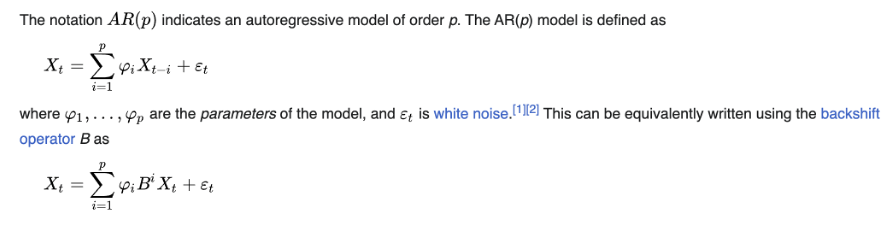

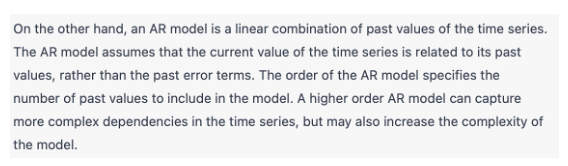

## 2. MA - Moving Average Model (qth order of MA)

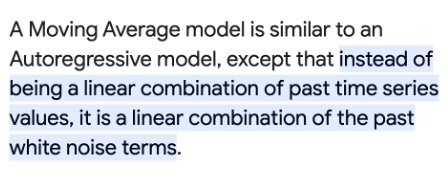

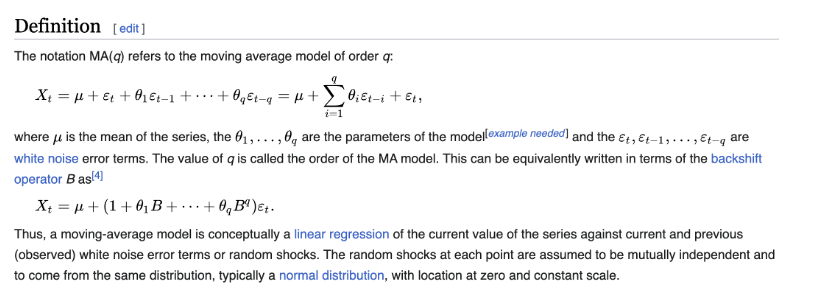

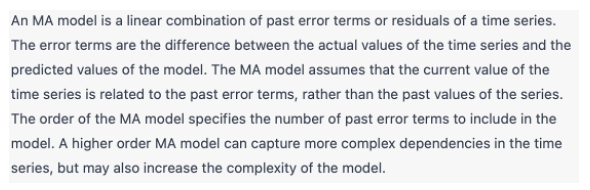

## 3. ARMA - Auto Regressive Moving Average Model (p,q)

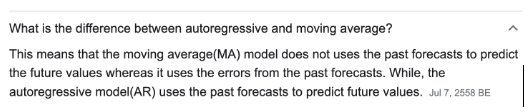

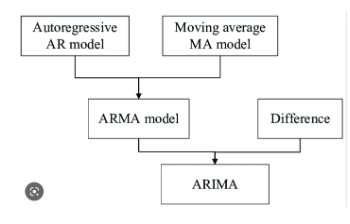

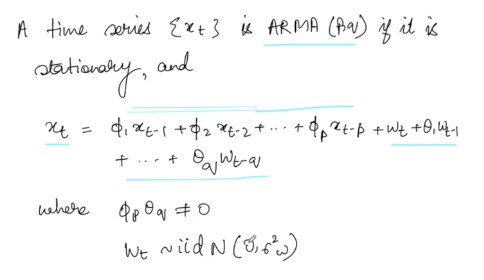

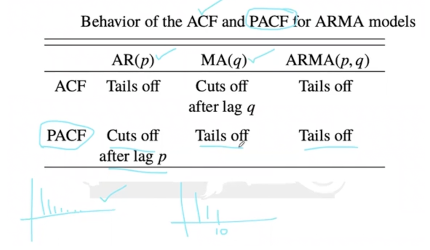

# Moving Average Model  - Practical

curr value = curr error + m*previous error
* assuming constant(delta) to be zero

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, datetime
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fft import fft
from scipy import fftpack
from sklearn.metrics import mean_squared_error

# Create a TS with MA model of order 1 with lag=1, m=0.8 

#### Moving Average - Order1

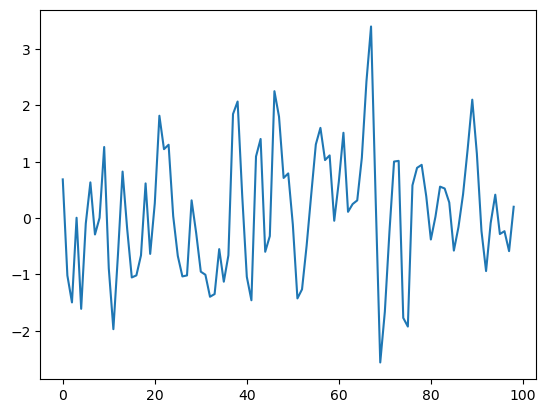

In [2]:
np.random.seed(1)
errors = [np.random.randn()]
ts = [] # creating time series data 

for x in range(1,100):
    curr_error = np.random.randn()
    curr_value = curr_error + 0.8*errors[x-1] 
    errors.append(curr_error)
    ts.append(curr_value)
plt.plot(ts);

# Generate an autocorrelation plot
* <font color=blue>Since we are comparing time series data with its own past values it is called as Autocorrelation
* To see the scope for prediction


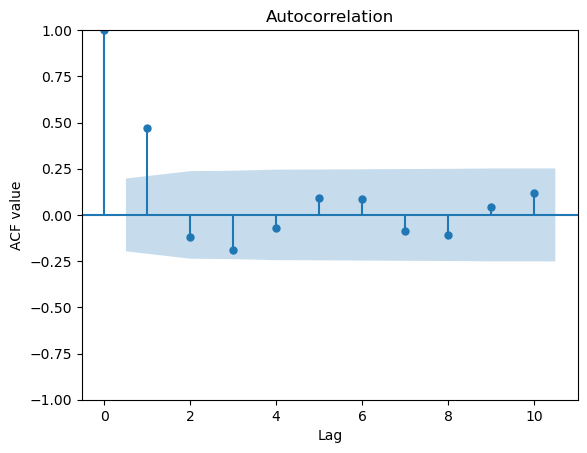

In [3]:
plot_acf(ts, lags=10)
plt.xlabel('Lag')
plt.ylabel('ACF value');

* Whether to use MA or AR model, can be known using ACF plot
* Above graph shows that there is only one lag value(outside shaded area) which is significant and rest of lag values(inside shaded area) are insignificant(almost ~zero)
* Means that current value is dependent upon its previous value and not any other historical value(for eg day b4 yesterday values etc.)
* In this case it can be assumed to be a moving average model with order-1 i.e in this case it depends only on previous day's value alone
* For value at lag 1, we should have a significant coefficient
* In a time series data if the **ACF plot** looks like above shown graph, we go for **MA model** in which the ACF value is largely cut off after a certain lag and order is 1 because of 1 lag having significant value depending upon previous value


# Moving Average - Order1 (One level dependency)
### Create a signal where the current value depends upon previous to previous value(like day b4 yesterday value/lag=2) and take m=0.6


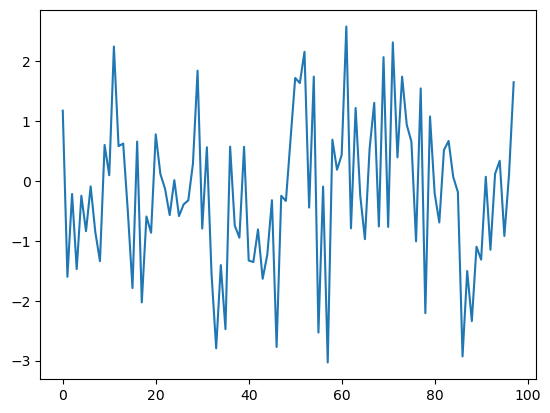

In [4]:
np.random.seed(3)
errors = [np.random.randn(), np.random.randn()]
ts = [] # creating time series data 

for x in range(2,100): # initiating with 2 coz we want to start from lag-2
    curr_error = np.random.randn()
    curr_value = curr_error + 0.6*errors[x-2] # Order1 (One level dependency with lag-2)
    
    errors.append(curr_error)
    ts.append(curr_value)
plt.plot(ts);

# Draw an acf_plot

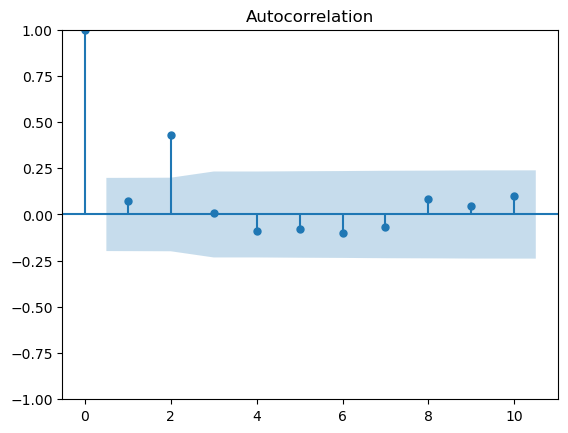

In [5]:
plot_acf(ts, lags=10);

* In above Autocorrelation plot there is a scope for prediction 
* There is a sharp cut off after lag 2 so we can go for MA model
* Order is 1 coz there is only one value at lag 2 in ACF plot and current value is dependent upon previous to previous value 

# Moving Average - Order2 (Two level dependencies)
* Including previous value(lag-1) with m=0.7 and previous to previous value(lag-2) with m=0.4

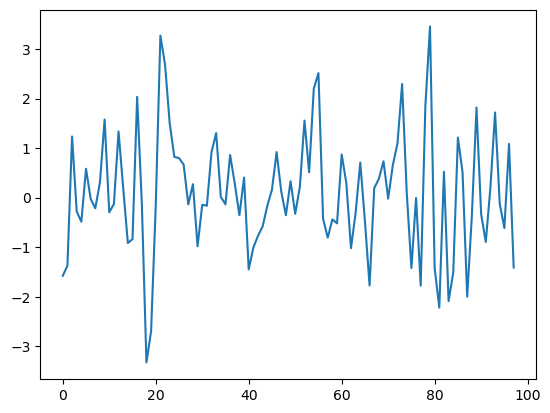

In [6]:
np.random.seed(10)
errors = [np.random.randn(), np.random.randn()]
ts = [] # creating time series data 

for x in range(2,100):
    curr_error = np.random.randn()
    curr_value = curr_error + 0.7*errors[x-1] - 0.4*errors[x-2]
    # creating a signal where the current value depends upon previous value(yesterday value) 
    # & previous to previous value(like day b4 yesterday value)
    errors.append(curr_error)
    ts.append(curr_value)
plt.plot(ts);

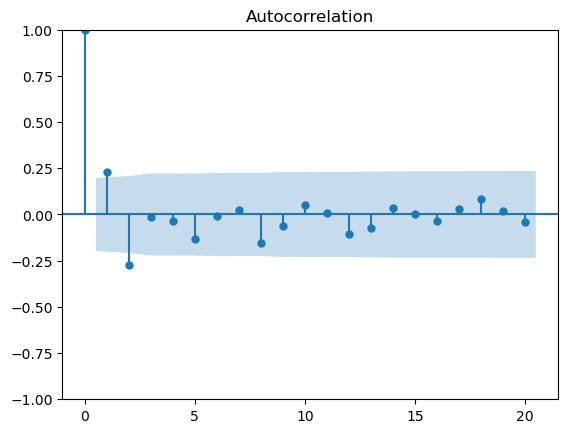

In [7]:
plot_acf(np.array(ts));

/Users/sylvia/opt/anaconda3/envs/tf_dl/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


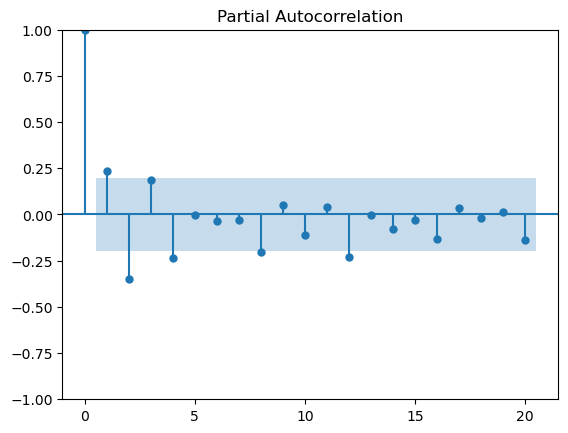

In [8]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(np.array(ts));

* In above graph - we have two values going outside of shaded area having significant values
* We consider MA model coz after lag 2 there is a sharp cut off and all other values are ~zero(insignificant values)

# AutoRegressive Model

x[t] = e[t] + m1*x[t-1] 
* x[t-1] is previous value

# Create a signal using AR model with m=0.6 and range(1,1000)

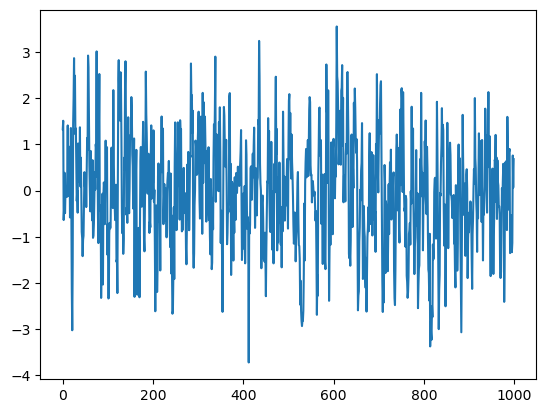

In [9]:
np.random.seed(10)
ts = [np.random.randn()]

for x in range(1,1000):
    curr_error = np.random.randn()
    curr_value = curr_error + 0.6*ts[x-1] # here the current value depends upon previous value 
    ts.append(curr_value)
    
plt.plot(ts);    

# Draw an acf_plot 

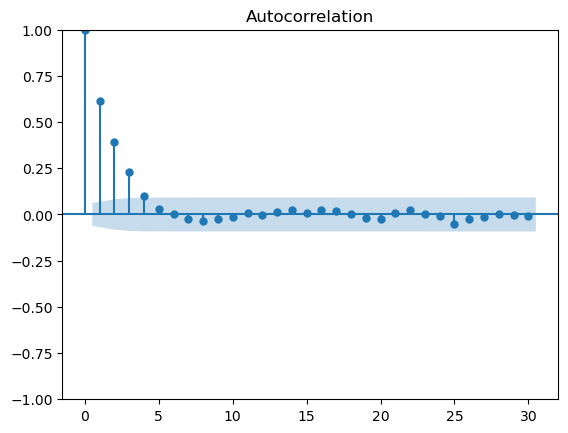

In [10]:
plot_acf(np.array(ts));

**In above graph, we can see that values are decreasing exponentially coz one value depends on previous value**

* x[t] = e[t] + m1 * x[t-1] ---> Direct Relationship
* x[t] = e[t] + m1 * (e[t-1]+m1*x[t-2]) ---> Indirect Relationship 

* we have expanded x[t-1] into (e[t-1]+m1*x[t-2]) in **Indirect Relationship**  

**Note** - 
* 1) We call it **Auto Regressive** coz it has relationship with current timestamp, previous timestamp and previous to previous timestamp and the relationship slowly fades away. 
* 2) It becomes very difficult to find the order for AR model just by looking at **Autocorrelation fn graph** (plot_acf) alone and that's why we need to use **PACF**, which only looks for direct relationship
* x[t] = e[t] + coef1 * x[t-1] + coef2 * x[t-2] + ---> Direct Relationship

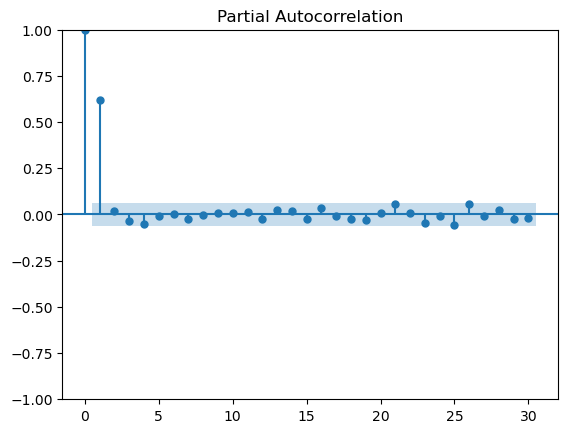

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(np.array(ts));

* From above graph we can see that we have only one value at lag-1 having relationship and all other values are zero
* So when there is a sharp cut off in a **PACF** plot then it's more likely to be an **AR model** of order-1 

# Create a AR model where current value directly depends on previous to previous value (lag-2) with m=0.6 and range(2,1000)

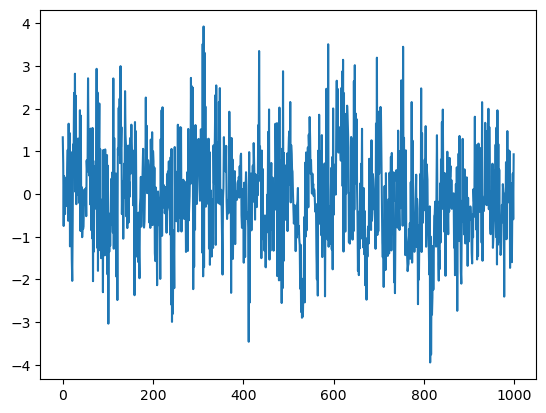

In [12]:
np.random.seed(10)
ts = [np.random.randn(), np.random.randn()]

for x in range(2,1000):
    curr_error = np.random.randn()
    curr_value = curr_error + 0.6*ts[x-2] # here the current value depends upon previous to previous value 
    ts.append(curr_value)
    
plt.plot(ts);    

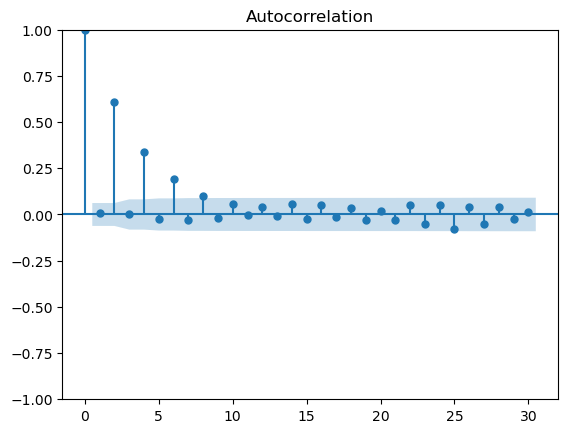

In [13]:
plot_acf(np.array(ts));

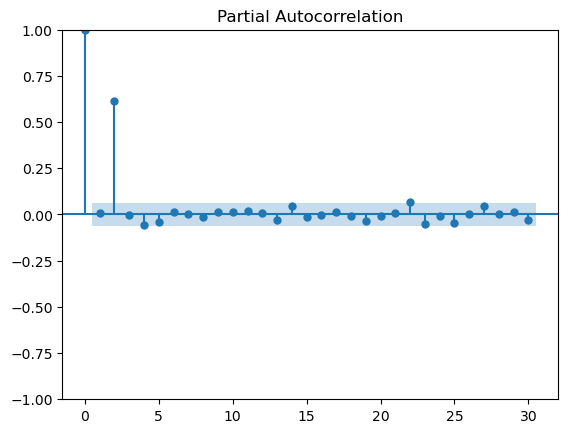

In [14]:
plot_pacf(np.array(ts));

* We are only getting exponentially decaying relationship from **ACF**  
* We are getting direct relationship from only **PACF** (at lag_2)

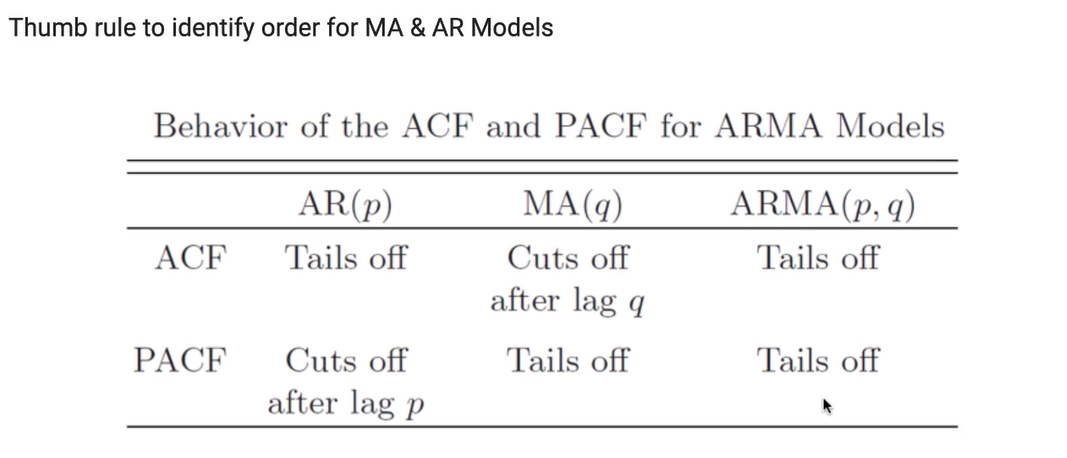